# <center>Machine Predictive Maintenance Classification

### <u>About Dataset
<h3>Machine Predictive Maintenance Classification Dataset<br><br>
<h4>Since real predictive maintenance datasets are generally difficult to obtain and in particular difficult to publish, we present and provide a synthetic dataset that reflects real predictive maintenance encountered in the industry to the best of our knowledge.<br><br>

<h4>The dataset consists of 10 000 data points stored as rows with 14 features in columns<br><br>

°  UID: unique identifier ranging from 1 to 10000<br><br>
°  productID: consisting of a letter L, M, or H for low (50% of all products), medium (30%), and high (20%) as product quality       variants and a variant-specific serial number<br><br>
°  air temperature [K]: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K<br><br>
°  process temperature [K]: generated using a random walk process normalized to a standard deviation of 1 K, added to the air   temperature plus   10K.<br><br>
°  rotational speed [rpm]: calculated from powepower of 2860 W, overlaid with a normally distributed noise<br><br>
°  torque [Nm]: torque values are normally distributed around 40 Nm with an Ïƒ = 10 Nm and no negative values.<br><br>
°  tool wear [min]: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process and a 'machine        failure' label that indicates, whether the machine has failed in this particular data point for any of the following failure     modes are true.<br><br>

<h5><a href= "https://www.kaggle.com/datasets/shivamb/machine-predictive-maintenance-classification">www.kaggle.com/dataset/Machine_Predictive_Maintenance_Classification </a>

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import RocCurveDisplay,accuracy_score,confusion_matrix,roc_curve,roc_auc_score,auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.multiclass import OneVsRestClassifier
from imblearn.over_sampling import RandomOverSampler,SMOTE
from sklearn.svm import LinearSVC,SVC

In [2]:
data = pd.read_csv('./predictive_maintenance.csv')
data

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


### Summary of Dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


### Checking Number of Shape and Column

In [4]:
data.shape

(10000, 10)

### Checking Names of Column

In [5]:
data.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

### Description of data

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
UDI,10000.0,5000.50000,2886.895680,1.0,2500.75,5000.5,7500.25,10000.0
Air temperature [K],10000.0,300.00493,2.000259,295.3,298.30,300.1,301.50,304.5
Process temperature [K],10000.0,310.00556,1.483734,305.7,308.80,310.1,311.10,313.8
Rotational speed [rpm],10000.0,1538.77610,179.284096,1168.0,1423.00,1503.0,1612.00,2886.0
Torque [Nm],10000.0,39.98691,9.968934,3.8,33.20,40.1,46.80,76.6
Tool wear [min],10000.0,107.95100,63.654147,0.0,53.00,108.0,162.00,253.0
Target,10000.0,0.03390,0.180981,0.0,0.00,0.0,0.00,1.0


### Checking Null values

In [7]:
data.isnull().mean()*100

UDI                        0.0
Product ID                 0.0
Type                       0.0
Air temperature [K]        0.0
Process temperature [K]    0.0
Rotational speed [rpm]     0.0
Torque [Nm]                0.0
Tool wear [min]            0.0
Target                     0.0
Failure Type               0.0
dtype: float64

### Checking Dupilcated values

In [8]:
data.duplicated().sum()

0

### Dropping Unwanted Columns

In [9]:
data.drop(columns=['UDI', 'Product ID'],inplace=True)

### Re-correcting Columns name

In [10]:
data.rename(columns={'Air temperature [K]':'Air_temperature[K]',
          'Process temperature [K]':'Processtemperature[K]','Rotational speed [rpm]':'Rotationalspeed[rpm]',
          'Torque [Nm]':'Torque[Nm]','Tool wear [min]':'Toolwear[min]', 'Failure Type':'FailureType'},inplace= True)

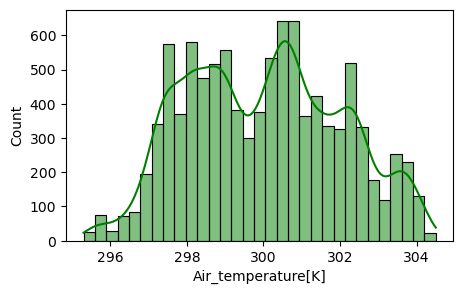

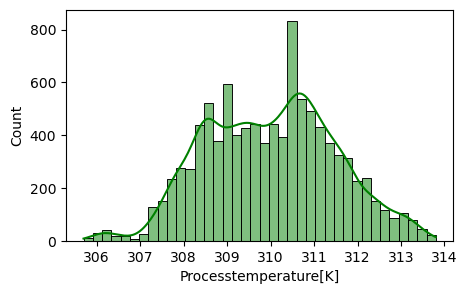

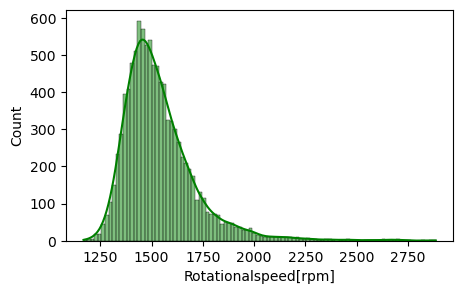

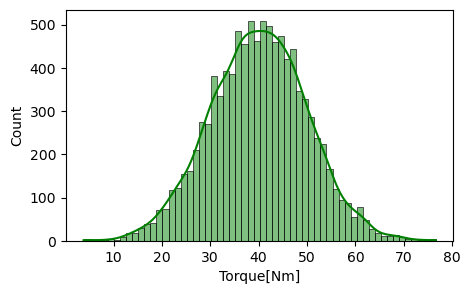

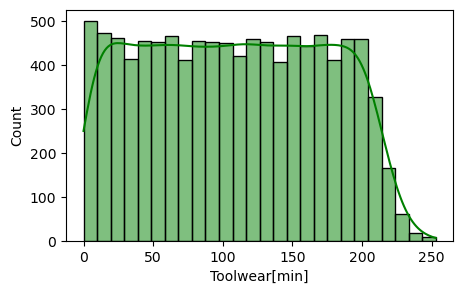

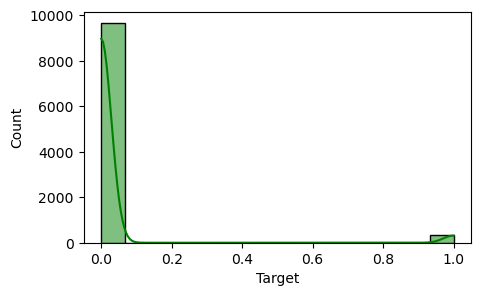

In [11]:
for k in data.columns:
    if data[k].dtypes != object:
        plt.figure(figsize=(5,3))
        sns.histplot(data[k],kde= True,color='Green')
        plt.show()

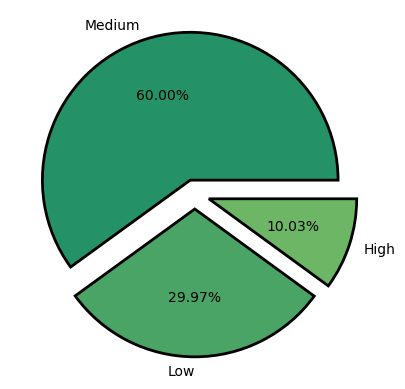

In [12]:
#letter L, M, or H for low (50% of all products), medium (30%), and high (20%) as product quality variants and a variant-specific serial number
palette_color=sns.color_palette('summer')
plt.pie(data=data,x=data.Type.value_counts(),explode=[0.1,0.1,0.1],colors=palette_color,autopct='%0.2f%%',startangle = 0,
        wedgeprops = {"edgecolor" : "black",
                    'linewidth' : 2,
                    'antialiased': True},labels=['Medium','Low',"High"])
plt.show()

### Barplot

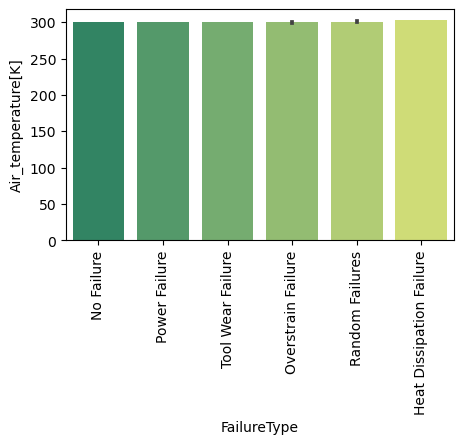

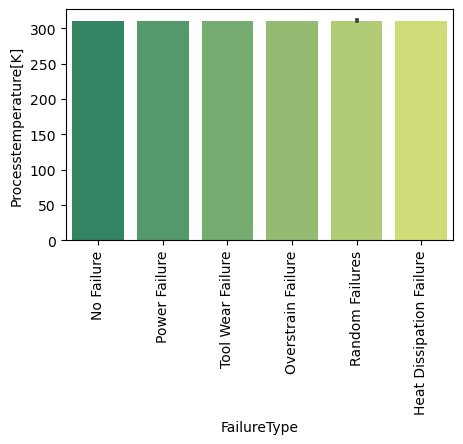

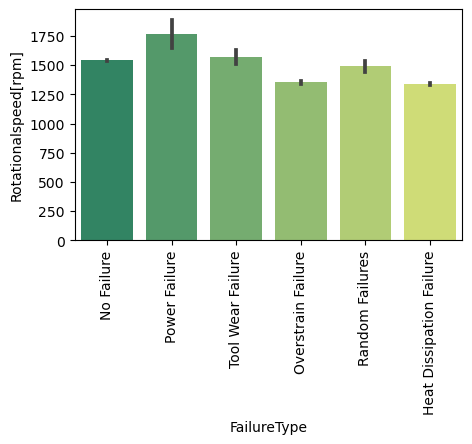

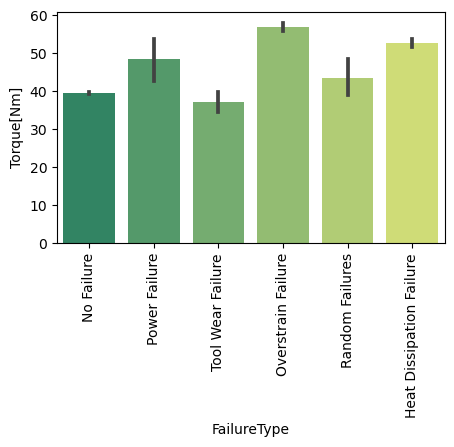

In [13]:


plt.figure(figsize=(5,3))
sns.barplot(data=data,x="FailureType", y="Air_temperature[K]", palette="summer")
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(5,3))
sns.barplot(data=data,x="FailureType", y="Processtemperature[K]", palette="summer")
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(5,3))
sns.barplot(data=data,x="FailureType", y="Rotationalspeed[rpm]", palette="summer")
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(5,3))
sns.barplot(data=data,x="FailureType", y="Torque[Nm]", palette="summer")
plt.xticks(rotation=90)
plt.show()

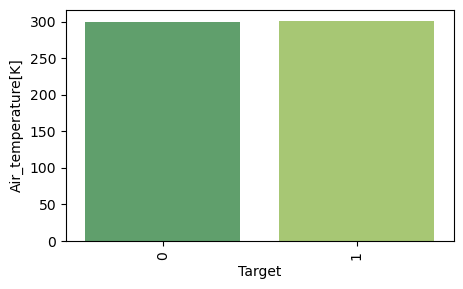

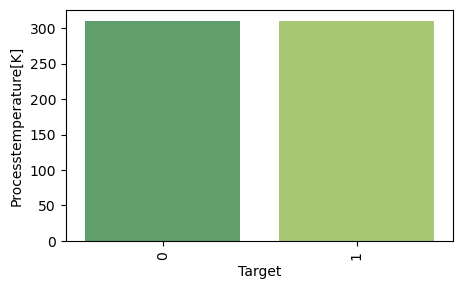

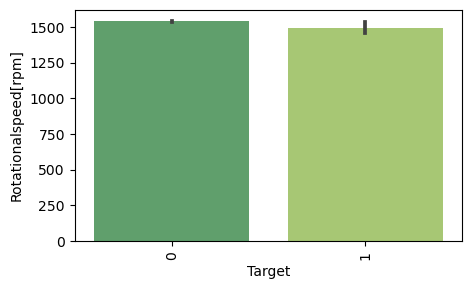

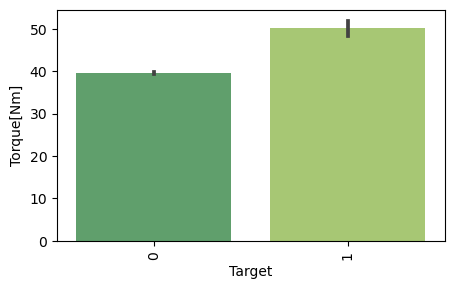

In [14]:
plt.figure(figsize=(5,3))
sns.barplot(data=data,x="Target", y="Air_temperature[K]", palette="summer")
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(5,3))
sns.barplot(data=data,x="Target", y="Processtemperature[K]", palette="summer")
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(5,3))
sns.barplot(data=data,x="Target", y="Rotationalspeed[rpm]", palette="summer")
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(5,3))
sns.barplot(data=data,x="Target", y="Torque[Nm]", palette="summer")
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:>

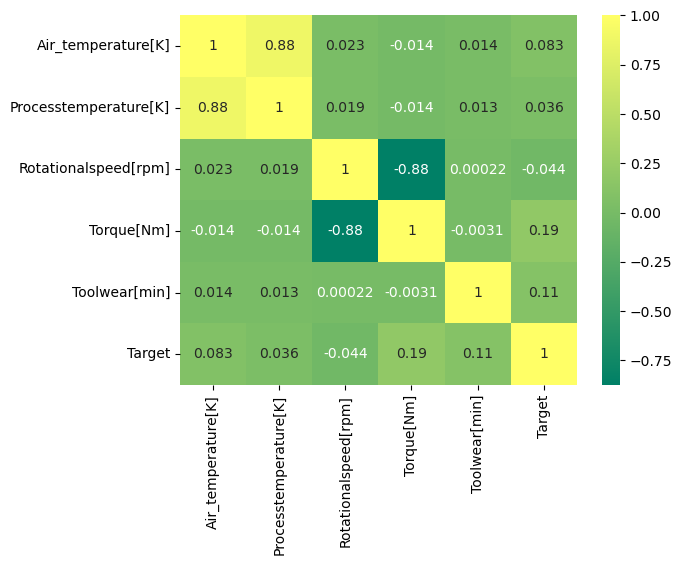

In [15]:
sns.heatmap(data.corr(),annot=True,cmap="summer")

### Pairplot

<Figure size 600x400 with 0 Axes>

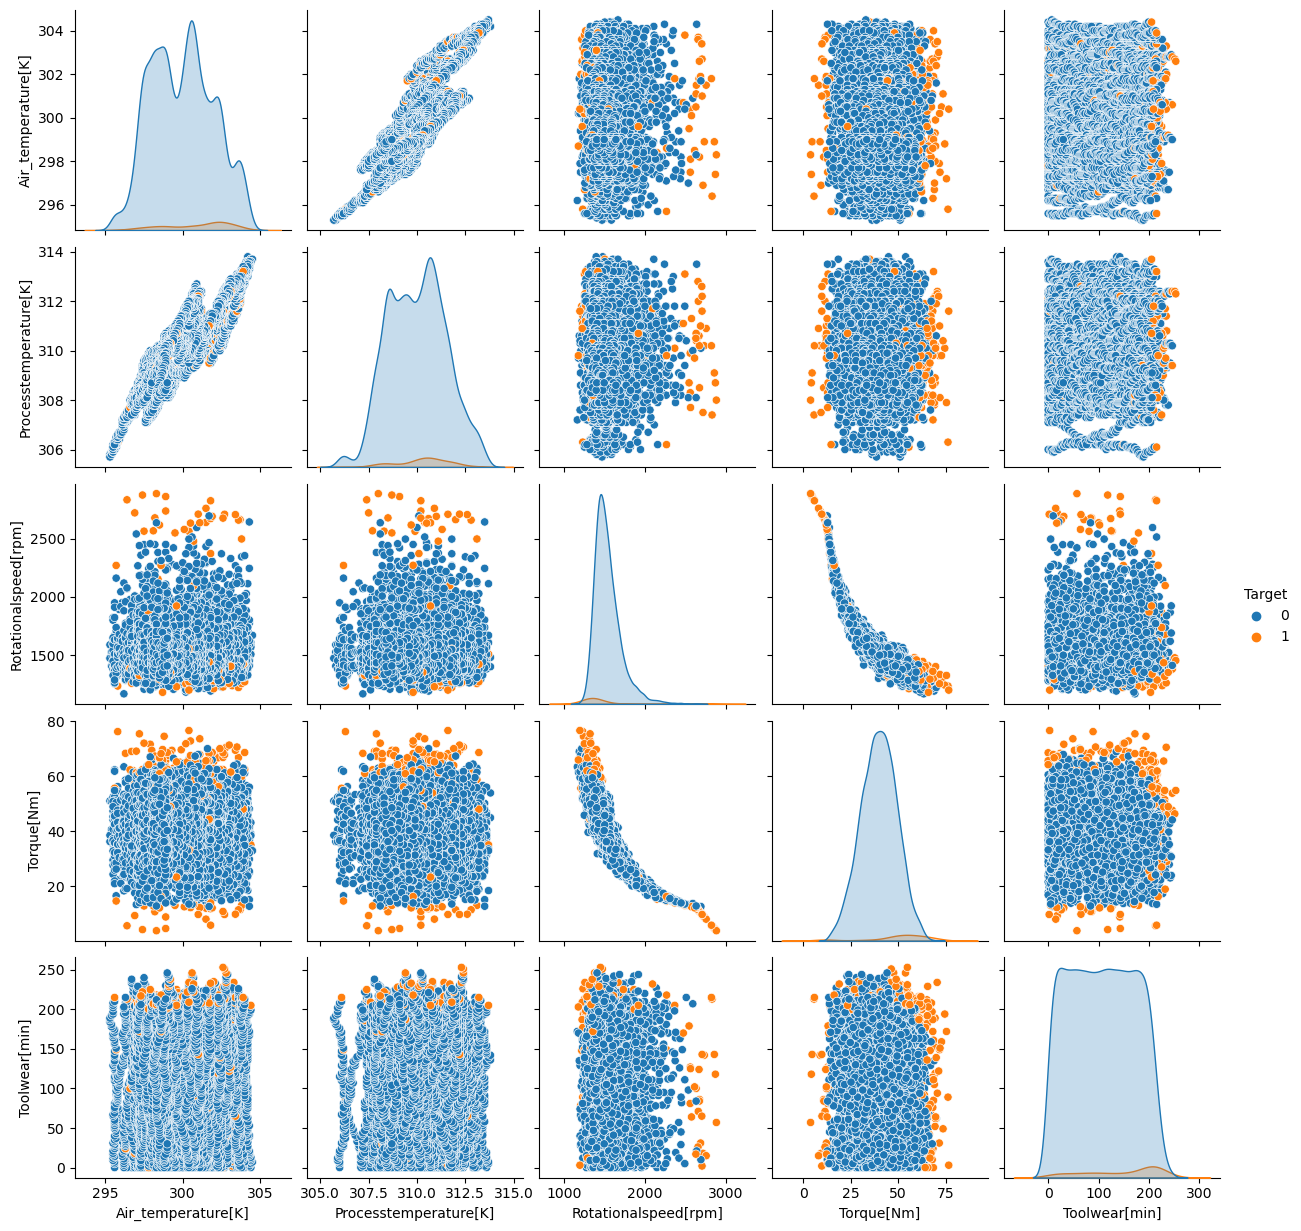

In [16]:
plt.figure(figsize=(6,4))
sns.pairplot(data,hue = 'Target');

### Creating a New dataframe from existing

In [17]:
df = data[['Type', 'Air_temperature[K]', 'Processtemperature[K]',
       'Rotationalspeed[rpm]', 'Torque[Nm]', 'Toolwear[min]', 
       'FailureType','Target']].copy()

### Label Encoding

In [18]:
le = LabelEncoder()

### Converting m categorical variables into numerical form.

In [19]:
for i in df.columns:
    if(df[i].dtypes == object):
        df[i]=le.fit_transform(df[i])

In [20]:
df

,Type,Air_temperature[K],Processtemperature[K],Rotationalspeed[rpm],Torque[Nm],Toolwear[min],FailureType,Target
0,2,298.1,308.6,1551,42.8,0,1,0
1,1,298.2,308.7,1408,46.3,3,1,0
2,1,298.1,308.5,1498,49.4,5,1,0
3,1,298.2,308.6,1433,39.5,7,1,0
4,1,298.2,308.7,1408,40.0,9,1,0
...,...,...,...,...,...,...,...,...
9995,2,298.8,308.4,1604,29.5,14,1,0
9996,0,298.9,308.4,1632,31.8,17,1,0
9997,2,299.0,308.6,1645,33.4,22,1,0
9998,0,299.0,308.7,1408,48.5,25,1,0


##### Here we can easy understand that all categorical values were changed to numerical format

### Feature & Target Selection 

In [21]:
x = df.iloc[:,:-1].values
x

array([[  2. , 298.1, 308.6, ...,  42.8,   0. ,   1. ],
       [  1. , 298.2, 308.7, ...,  46.3,   3. ,   1. ],
       [  1. , 298.1, 308.5, ...,  49.4,   5. ,   1. ],
       ...,
       [  2. , 299. , 308.6, ...,  33.4,  22. ,   1. ],
       [  0. , 299. , 308.7, ...,  48.5,  25. ,   1. ],
       [  2. , 299. , 308.7, ...,  40.2,  30. ,   1. ]])

In [22]:
y= df.iloc[:,-1].values
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Standard scaler

In [23]:
#sc = StandardScaler()

In [24]:
#x_sc =sc.fit_transform(x)

### Model Building

In [25]:
models = {
   "LogisticRegression" : LogisticRegression(),
   "DecisionTreeClassifier"     : DecisionTreeClassifier(),
   "RandomForestClassifier"     : RandomForestClassifier(),
   "KNeighborsClassifier"       : KNeighborsClassifier(),
   "GradientBoostingClassifier" : GradientBoostingClassifier(),
   "AdaBoostClassifier"         : AdaBoostClassifier()
}

In [26]:
for name,model in models.items():
    score = cross_val_score(model,x,y,scoring="accuracy",cv =10,n_jobs=-1 )
    print("Cross Validation  :{}".format(name))
    print("Mean Score        : ",np.mean(score)*100)
    print("-"*100)

Cross Validation  :LogisticRegression
Mean Score        :  97.75
----------------------------------------------------------------------------------------------------
Cross Validation  :DecisionTreeClassifier
Mean Score        :  99.69999999999999
----------------------------------------------------------------------------------------------------
Cross Validation  :RandomForestClassifier
Mean Score        :  99.83999999999999
----------------------------------------------------------------------------------------------------
Cross Validation  :KNeighborsClassifier
Mean Score        :  96.98
----------------------------------------------------------------------------------------------------
Cross Validation  :GradientBoostingClassifier
Mean Score        :  99.82000000000001
----------------------------------------------------------------------------------------------------
Cross Validation  :AdaBoostClassifier
Mean Score        :  99.9
----------------------------------------------------

#### Here we got high accuracy in all model but we are taking RandomForestClassifier

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [28]:
model = RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [29]:
model.fit(x_train,y_train)
print("Model Trained with {}".format(name))
score_train = accuracy_score(y_train,model.predict(x_train))
score_test = accuracy_score(y_test,model.predict(x_test))
confussion_train = confusion_matrix(y_train,model.predict(x_train))
confussion_test = confusion_matrix(y_train,model.predict(x_train))
print("Model accuracy on train is:",score_train)
print("Model accuracy on test is :",score_test)
print("Confussion_matrix train is:",confussion_train)
print("Confussion_matrix test is :",confussion_test)
print("Wrong Predictions made:",(y_test !=model.predict(x_test)).sum(),'/',((y_test == model.predict(x_test)).sum()+(y_test != model.predict(x_test)).sum()))

Model Trained with AdaBoostClassifier
Model accuracy on train is: 1.0
Model accuracy on test is : 0.999
Confussion_matrix train is: [[7736    0]
 [   0  264]]
Confussion_matrix test is : [[7736    0]
 [   0  264]]
Wrong Predictions made: 2 / 2000


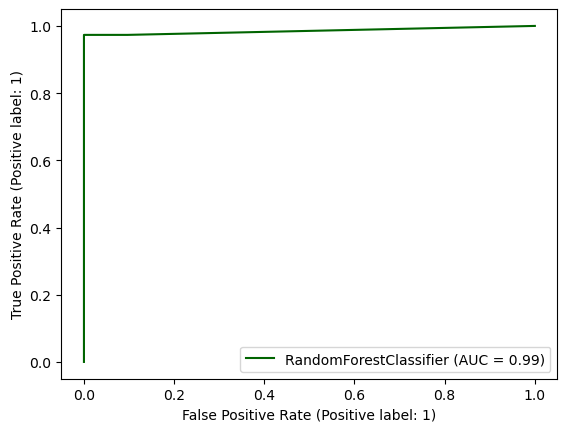

In [30]:
ROC_DISPLAY = RocCurveDisplay.from_estimator(model,x_test,y_test,color="DarkGreen")

In [31]:
y_pre = model.predict(x_test)

In [32]:
output = pd.DataFrame(zip(y_test,y_pre),columns=('actual','predicted'))
output

,actual,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1995,0,0
1996,0,0
1997,0,0
1998,0,0


In [33]:
import pickle
pickle.dump(model, open('MODEL.pkl', 'wb'))

In [36]:
df[df['Target'] == 1]

,Type,Air_temperature[K],Processtemperature[K],Rotationalspeed[rpm],Torque[Nm],Toolwear[min],FailureType,Target
50,1,298.9,309.1,2861,4.6,143,3,1
69,1,298.9,309.0,1410,65.7,191,3,1
77,1,298.8,308.9,1455,41.3,208,5,1
160,1,298.4,308.2,1282,60.7,216,2,1
161,1,298.3,308.1,1412,52.3,218,2,1
...,...,...,...,...,...,...,...,...
9758,1,298.6,309.8,2271,16.2,218,5,1
9764,1,298.5,309.5,1294,66.7,12,3,1
9822,1,298.5,309.4,1360,60.9,187,2,1
9830,1,298.3,309.3,1337,56.1,206,2,1
